In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [16]:
df = pd.read_csv('dataset.csv')

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
drop_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=drop_cols, inplace=True)

In [19]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

/var/folders/vy/bpb645w940104xm12cdmq4b80000gn/T/ipykernel_3696/4242198415.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


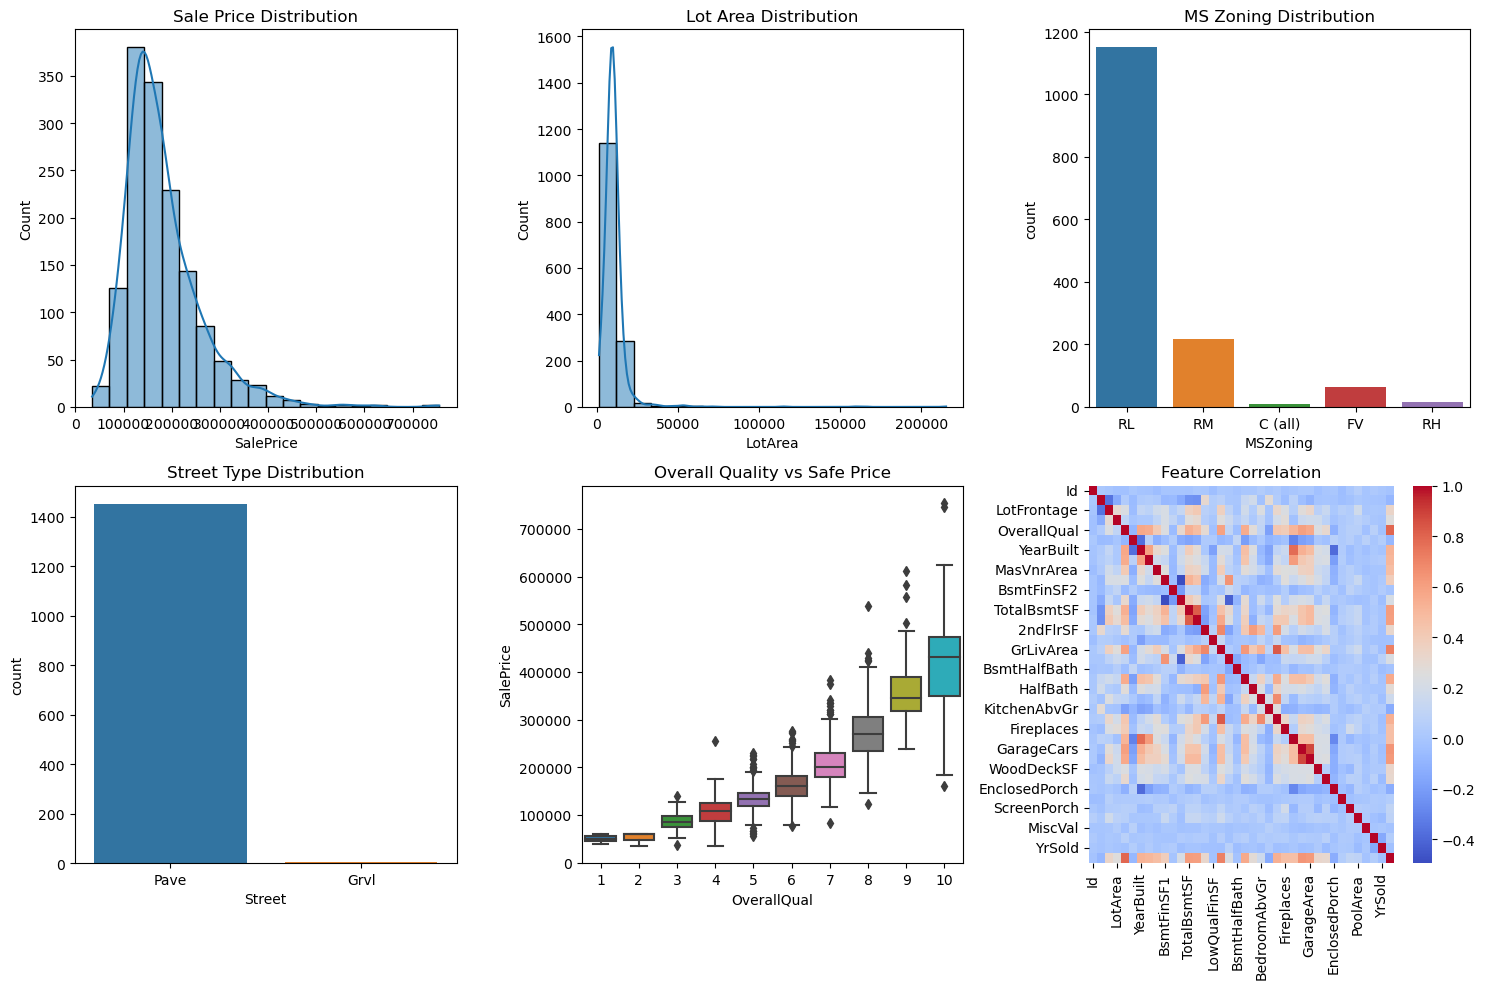

In [20]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.histplot(df['SalePrice'], bins=20, kde=True)
plt.title('Sale Price Distribution')

plt.subplot(2,3,2)
sns.histplot(df['LotArea'], bins=20, kde=True)
plt.title('Lot Area Distribution')

plt.subplot(2,3,3)
sns.countplot(x='MSZoning', data=df)
plt.title("MS Zoning Distribution")

plt.subplot(2,3,4)
sns.countplot(x='Street', data=df)
plt.title('Street Type Distribution')

plt.subplot(2,3,5)
sns.boxplot(x=df['OverallQual'], y=df['SalePrice'])
plt.title('Overall Quality vs Safe Price')

plt.subplot(2,3,6)
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation')

plt.tight_layout()
plt.show()

In [21]:
categorical_cols = df.select_dtypes(include=['object']).columns
print('Before Label Encoding:\n', df[categorical_cols].head())

Before Label Encoding:
   MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ          Gd   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive Sal

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

In [23]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [24]:
print('After Label Encoding:\n', df[categorical_cols].head())

After Label Encoding:
    MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  KitchenQual  Functional  \
0             5           2           2  ...            2           6   
1            24           1           2  ...            3           6   
2             5           2           2  ...            2           6   
3             6           2           2  ...            2           6   
4            15           2           2  ...            2           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCon

In [25]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['SalePrice', 'Id'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [27]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE: ", mean_absolute_error(y_test, y_pred))
print('MSE: ',mean_squared_error(y_test, y_pred))
print('R2 Score: ', r2_score(y_test, y_pred))

MAE:  17566.12434931507
MSE:  804003606.8042969
R2 Score:  0.8951799982051686
